<a href="https://colab.research.google.com/github/tanriders/Automobile-Customer-Segmentation/blob/main/DS_Marketing_Automobile_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install

# 1. Import Library

Import Libray ที่เราต้องการใช้

In [ ]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

from sklearn.cluster import KMeans
import fastai

import warnings


# 3. Dataset

ในเคสนี้ เราจะ Download ข้อมูล Dataset ที่เกี่ยวข้องทั้งหมดมาเก็บไว้ ซึ่งเป็นไฟลื CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4. Data

## 4.1 Exploratory Data Analysis

โหลดไฟล์ CSV ขึ้นมาใส่ Pandas Dataframe แล้วลอง[วิเคราะห์สำรวจข้อมูล Exploratory Data Analysis](https://www.bualabs.com/archives/2297/exploratory-data-analysis-eda-pandas-profiling-pandas-dataframe-pandas-ep-6/) มี 200 Row 5 Column

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/DS-Midterm/Automobile Customer Segmentation.csv")
df.shape

(10695, 11)

ดูข้อมูลตัวอย่าง 5 แถวแรก

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


ดูสถิติข้อมูล

In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


ดูชนิดข้อมูล เป็นตัวเลข ยกเว้น Gender ที่เป็น Object (String)

In [ ]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace = True)

<ipython-input-263-af658eae1e37>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       190
Age                  0
Graduated          102
Profession         162
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1              108
Segmentation         0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.619777,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.619777,High,6.0,Cat_6,A


เคสนี้มีข้อมูลขาดหาย ต้องทำ [Fillna](https://www.bualabs.com/archives/2085/what-is-preprocessing-handle-missing-value-fill-na-null-nan-before-feedforward-machine-learning-preprocessing-ep-1/)

In [ ]:
df.shape

(10157, 11)

## 4.2 Visualization

### ดู Histogram ของทั้ง 3 Column ที่เป็นตัวเลข

ดูการการะจายข้อมูลของทั้ง 3 Column

<ipython-input-269-f8f4b3c1f3c9>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-269-f8f4b3c1f3c9>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-269-f8f4b3c1f3c9>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

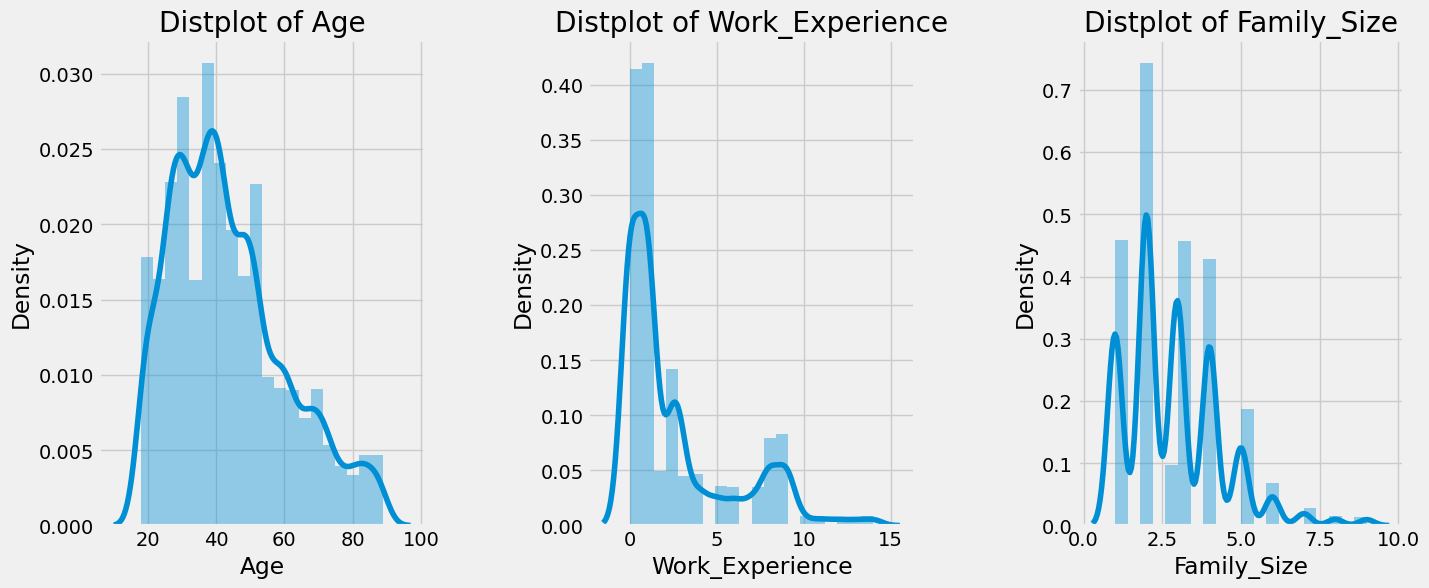

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Work_Experience' , 'Family_Size']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### สัดส่วน แต่ละเพศ

นับจำนวนตัวอย่างข้อมูล แยก Gender

In [ ]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
size

Male      5569
Female    4588
Name: Gender, dtype: int64

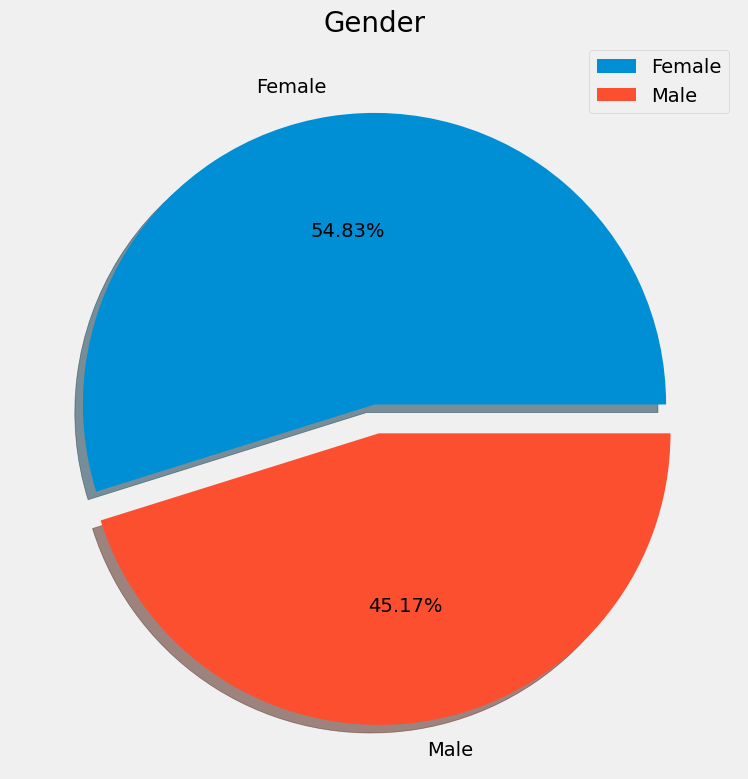

In [ ]:
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Customer Segmentation

In [ ]:
from sklearn.preprocessing import  LabelEncoder

In [ ]:
mk = LabelEncoder()
df['Gender'] = mk.fit_transform(df['Gender'])
df['Ever_Married'] = mk.fit_transform(df['Ever_Married'])
df['Graduated'] = mk.fit_transform(df['Graduated'])
df['Spending_Score'] = mk.fit_transform(df['Spending_Score'])
df['Var_1'] = mk.fit_transform(df['Var_1'])
df['Profession'] = mk.fit_transform(df['Profession'])
df['Family_Size'] = mk.fit_transform(df['Family_Size'])
df['Work_Experience'] = mk.fit_transform(df['Work_Experience'])
df['Segmentation'] = mk.fit_transform(df['Segmentation'])

In [ ]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,2,4,3,3
1,462643,0,1,38,1,2,3,0,3,3,0
2,466315,0,1,67,1,2,1,2,0,5,1
3,461735,1,1,67,1,7,0,1,1,5,1
4,462669,0,1,40,1,3,3,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,0,29,0,5,10,2,4,5,1
10691,467958,0,0,35,1,1,1,2,0,5,0
10692,467960,0,0,53,1,3,3,2,1,5,2
10693,467961,1,1,47,1,4,1,1,5,3,2


In [ ]:
import seaborn as sns

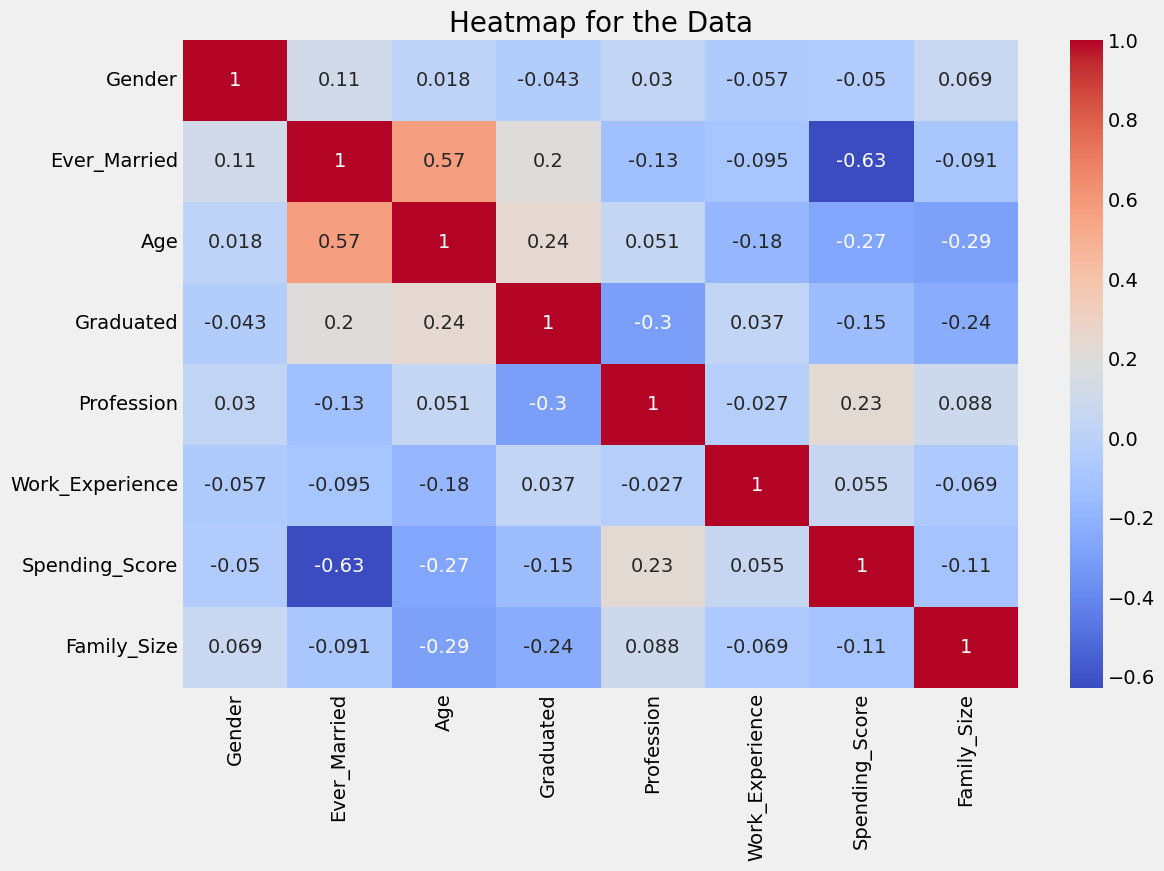

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
df.drop(["ID"], axis=1, inplace=True)
df.drop(["Var_1"], axis=1, inplace=True)
df.drop(["Segmentation"], axis=1, inplace=True)
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [ ]:
'''Annual Income (k$) and spending Score'''
X2 = df[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

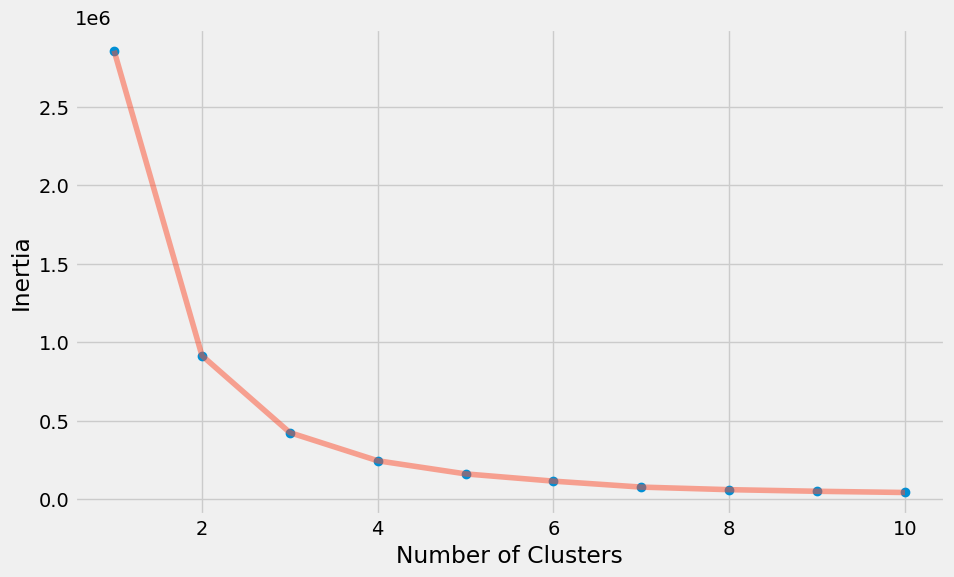

In [ ]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

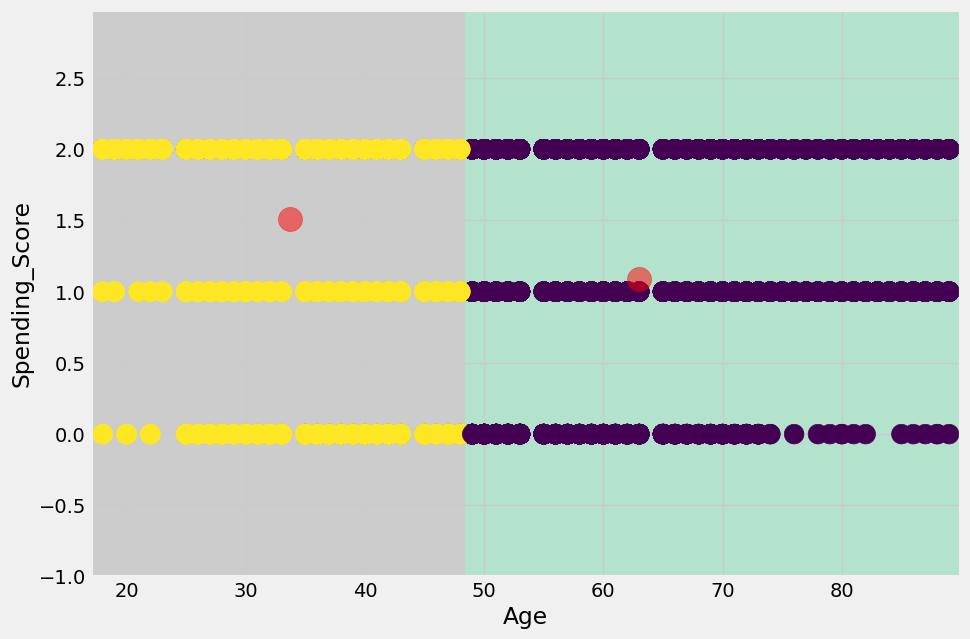

In [ ]:
plt.figure(1 , figsize = (10 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending_Score' , data = df , c = labels2 ,
            s = 200 , cmap = 'viridis')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Age')
plt.show()

In [ ]:
X3 = df[['Age' , 'Family_Size' ,'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

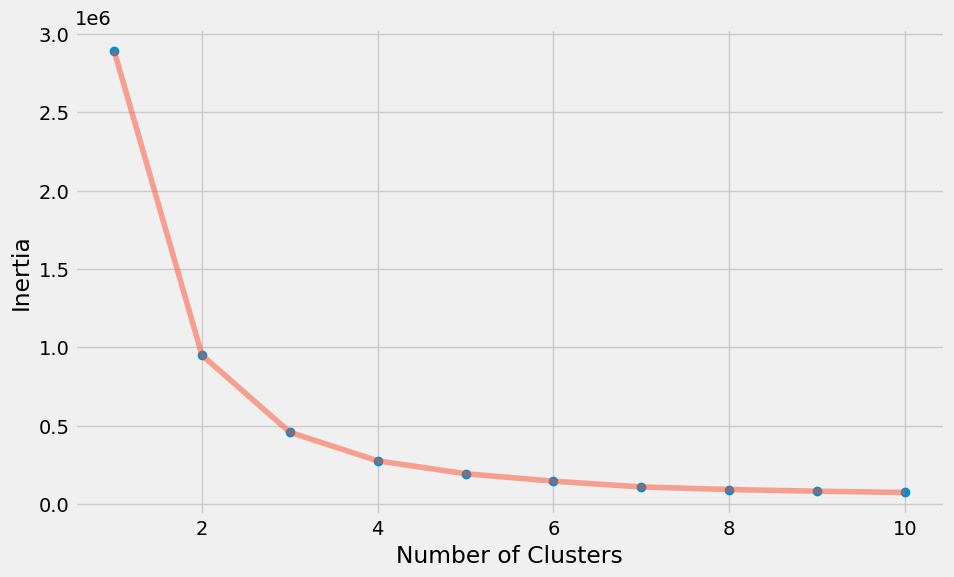

In [ ]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Family_Size'],
    z= df['Spending_Score'],
    mode='markers',
     marker=dict(
        color = df['label3'],
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    width=640,
    height=640,
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Family_Size'),
            zaxis = dict(title  = 'Spending_Score')
        )
)
fig = go.Figure(data=data, layout=layout)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
  '''))

In [ ]:
configure_plotly_browser_state()
py.offline.iplot(fig)

In [ ]:
#df_cluster = pd.concat([df, df['label3']], axis = 1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,label3
0,1,0,22,0,5,1,2,4,3
1,0,1,38,1,2,3,0,3,1
2,0,1,67,1,2,1,2,0,0
3,1,1,67,1,7,0,1,1,0
4,0,1,40,1,3,3,1,6,1


In [ ]:
labels3 = ['0', '1','2','3']
size3 = df['label3'].value_counts()
size3

1    3258
3    3095
2    2424
0    1380
Name: label3, dtype: int64

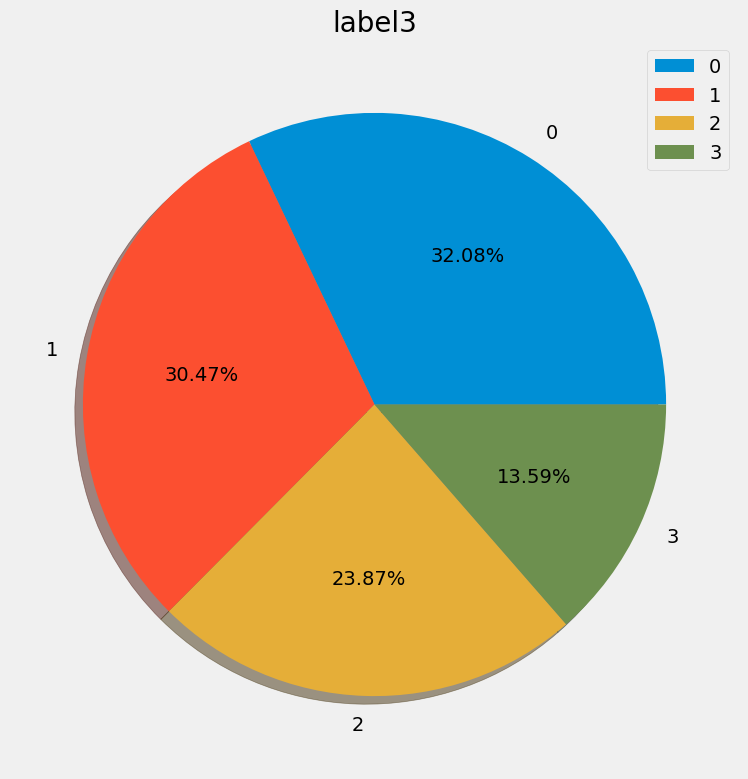

In [ ]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size3, labels = labels3, shadow = True, autopct = '%.2f%%')
plt.title('label3', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()